# Clean & Analyze Social Media

## Introduction

Social media has become a ubiquitous part of modern life, with platforms such as Instagram, Twitter, and Facebook serving as essential communication channels. Social media data sets are vast and complex, making analysis a challenging task for businesses and researchers alike. In this project, we explore a simulated social media, for example Tweets, data set to understand trends in likes across different categories.

## Prerequisites

To follow along with this project, you should have a basic understanding of Python programming and data analysis concepts. In addition, you may want to use the following packages in your Python environment:

- pandas
- Matplotlib
- ...

These packages should already be installed in Coursera's Jupyter Notebook environment, however if you'd like to install additional packages that are not included in this environment or are working off platform you can install additional packages using `!pip install packagename` within a notebook cell such as:

- `!pip install pandas`
- `!pip install matplotlib`

## Project Scope

The objective of this project is to analyze tweets (or other social media data) and gain insights into user engagement. We will explore the data set using visualization techniques to understand the distribution of likes across different categories. Finally, we will analyze the data to draw conclusions about the most popular categories and the overall engagement on the platform.

## Step 1: Importing Required Libraries

As the name suggests, the first step is to import all the necessary libraries that will be used in the project. In this case, we need pandas, numpy, matplotlib, seaborn, and random libraries.

Pandas is a library used for data manipulation and analysis. Numpy is a library used for numerical computations. Matplotlib is a library used for data visualization. Seaborn is a library used for statistical data visualization. Random is a library used to generate random numbers.

In [16]:
!pip install pandas
!pip install matplotlib

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random


You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/opt/conda/bin/python3 -m pip install --upgrade pip' command.


In [21]:
# Define the list of categories
categories = ['Food', 'Travel', 'Fashion', 'Fitness', 'Music', 'Culture', 'Family', 'Health']

# Set the number of periods (entries)
n = 500

# Create the data dictionary with Date, Category, and Likes
data = {
    'Date': pd.date_range('2021-01-01', periods=n),
    'Category': [random.choice(categories) for _ in range(n)],
    'Likes': np.random.randint(0, 10000, size=n)
}


In [22]:
# Convert to a pandas DataFrame
df = pd.DataFrame(data)
print(df.head())  # Display the first few entries to verify the structure

        Date Category  Likes
0 2021-01-01  Culture   6513
1 2021-01-02  Fitness   4264
2 2021-01-03     Food   6536
3 2021-01-04   Health   4516
4 2021-01-05  Culture   6469


In [4]:
# Check for missing values ​​for each column
missing_values = df.isnull().sum()
print("Valori mancanti per colonna:\n", missing_values)

#Show rows that contain missing values
rows_with_missing_values = df[df.isnull().any(axis=1)]
print("\nRighe con valori mancanti:\n", rows_with_missing_values)


Valori mancanti per colonna:
 Date        0
Category    0
Likes       0
dtype: int64

Righe con valori mancanti:
 Empty DataFrame
Columns: [Date, Category, Likes]
Index: []


In [8]:
df.head(100)

,Date,Category,Likes
0,2021-01-01,Music,1248
1,2021-01-02,Culture,1533
2,2021-01-03,Fashion,2060
3,2021-01-04,Travel,8975
4,2021-01-05,Family,7462
...,...,...,...
95,2021-04-06,Music,9593
96,2021-04-07,Fashion,6411
97,2021-04-08,Health,9802
98,2021-04-09,Food,104


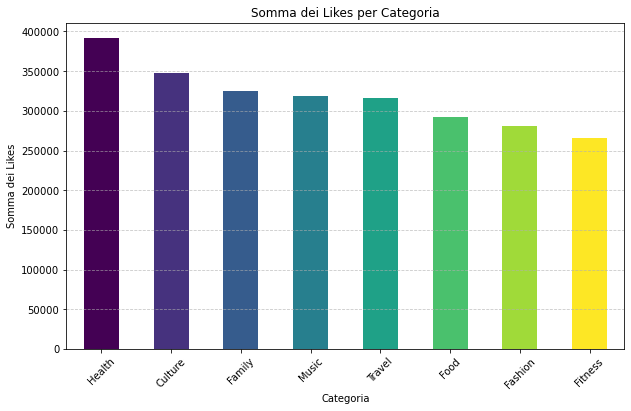

In [10]:

category_likes = df.groupby('Category')['Likes'].sum().sort_values(ascending=False)


num_categories = len(category_likes)
colors = plt.cm.viridis(np.linspace(0, 1, num_categories)) 


plt.figure(figsize=(10, 6))
category_likes.plot(kind='bar', color=colors)
plt.title('Somma dei Likes per Categoria')
plt.xlabel('Categoria')
plt.ylabel('Sum of the Likes')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

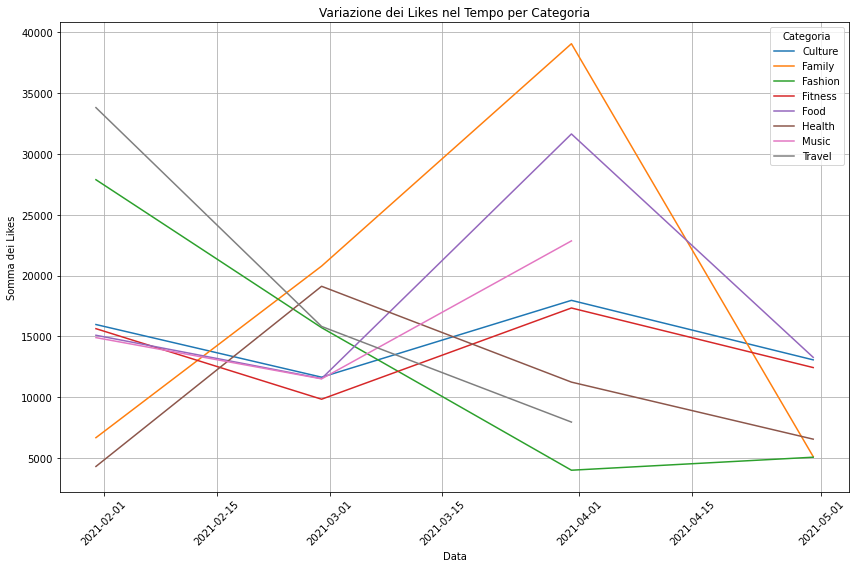

In [34]:

df['Date'] = pd.to_datetime(df['Date'])

df.set_index('Date', inplace=True)
likes_over_time = df.groupby([pd.Grouper(freq='M'), 'Category'])['Likes'].sum().unstack()


plt.figure(figsize=(12, 8))
for category in likes_over_time.columns:
    plt.plot(likes_over_time.index, likes_over_time[category], label=category)

plt.title('Change in Likes over Time by Category')
plt.xlabel('Data')
plt.ylabel('Sum of the Likes')
plt.xticks(rotation=45)
plt.legend(title='Categoria')
plt.grid(True)
plt.tight_layout()
plt.show()

<Figure size 720x432 with 0 Axes>

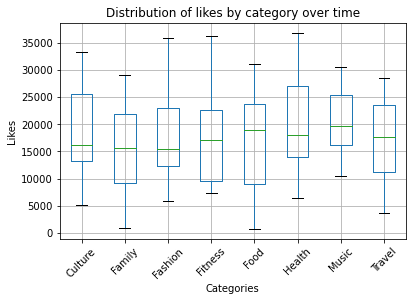

In [18]:

df['Date'] = pd.to_datetime(df['Date'])


df['Year-Month'] = df['Date'].dt.to_period('M')


likes_over_time = df.groupby(['Year-Month', 'Category'])['Likes'].sum().reset_index()

#  box plot
plt.figure(figsize=(10, 6))
likes_over_time.boxplot(by='Category', column='Likes', grid=False, showfliers=False)

plt.title('Distribution of likes by category over time')
plt.suptitle('')  
plt.xlabel('Categories')
plt.ylabel('Likes')
plt.xticks(rotation=45)
#plt.tight_layout()
plt.grid()
plt.show()

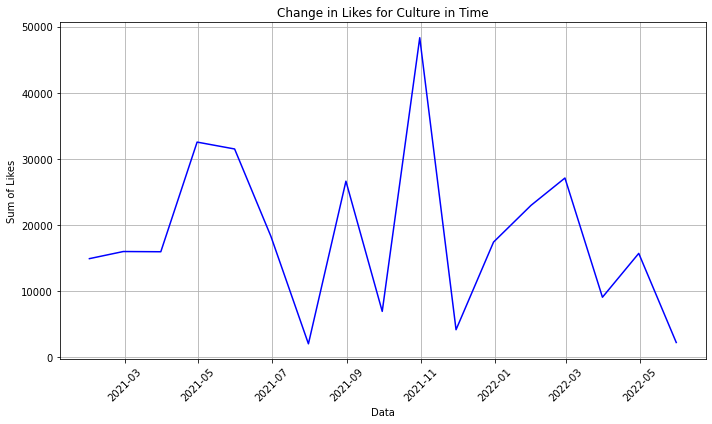

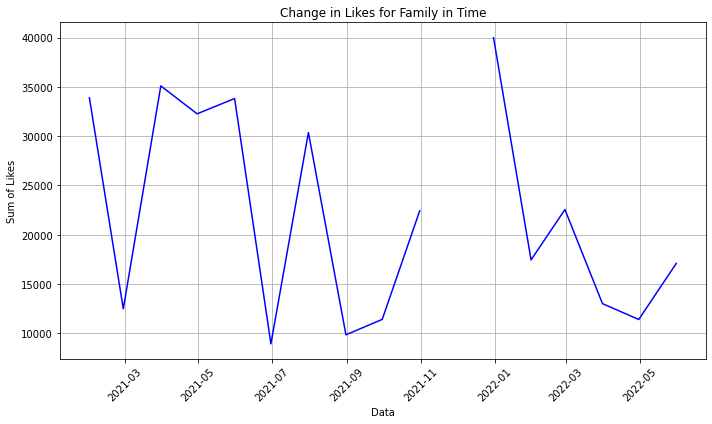

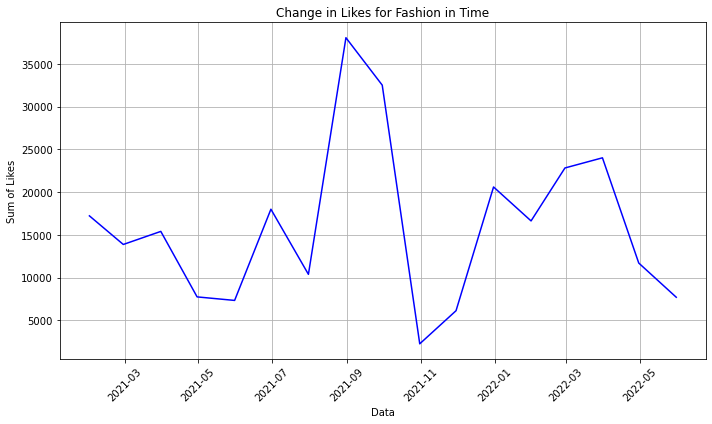

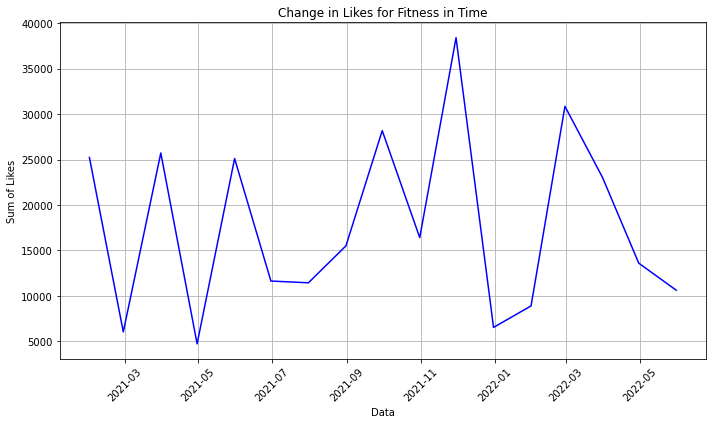

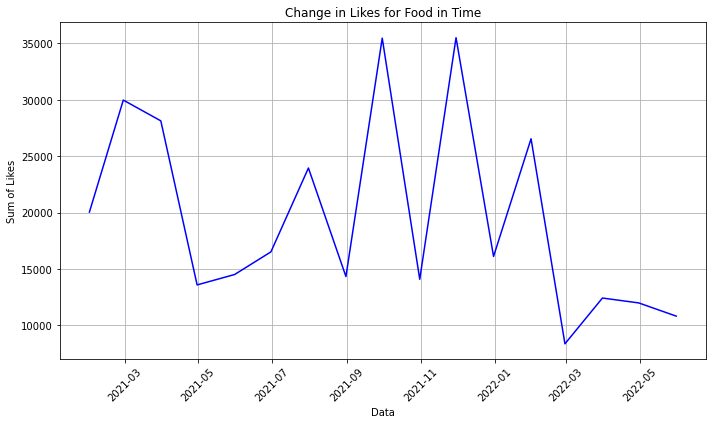

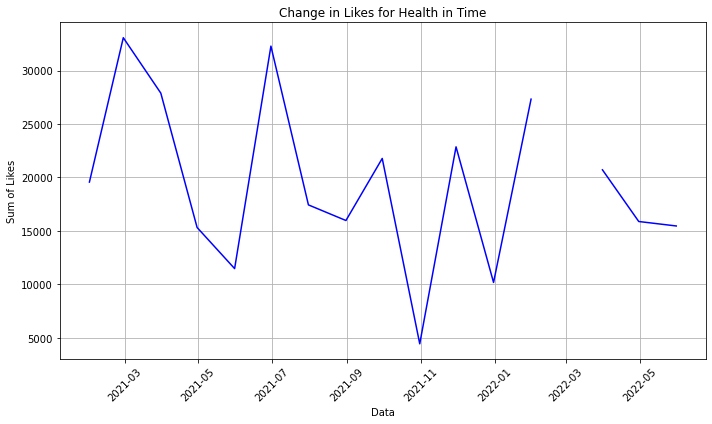

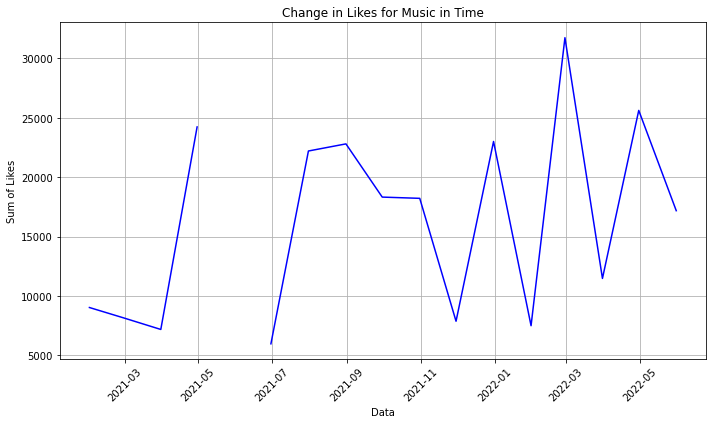

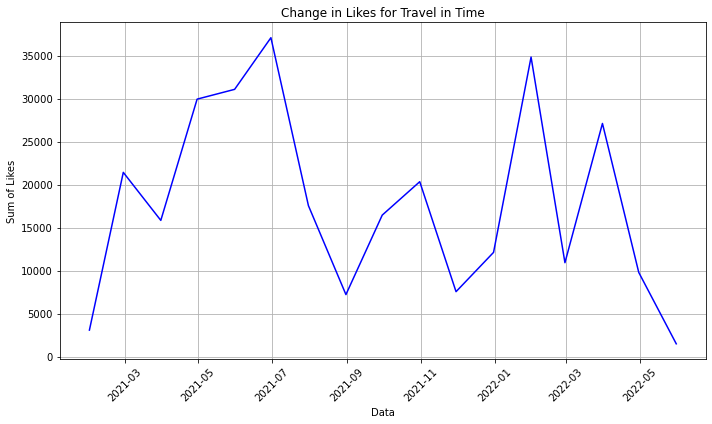

In [14]:

df['Date'] = pd.to_datetime(df['Date'])


df.set_index('Date', inplace=True)
likes_over_time = df.groupby([pd.Grouper(freq='M'), 'Category'])['Likes'].sum().unstack()


for category in likes_over_time.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(likes_over_time.index, likes_over_time[category], label=category, color='blue')
    plt.title(f'Change in Likes for {category} in Time')
    plt.xlabel('Data')
    plt.ylabel('Sum of Likes')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<Figure size 1008x576 with 0 Axes>

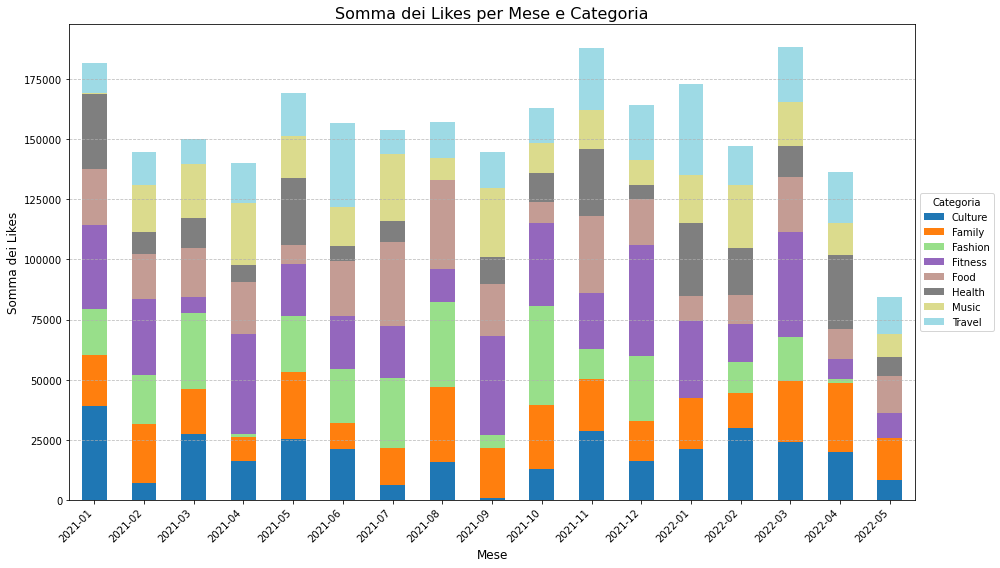

In [23]:



df.set_index('Date', inplace=True)
monthly_data = df.groupby([pd.Grouper(freq='M'), 'Category'])['Likes'].sum().unstack().fillna(0)


plt.figure(figsize=(14, 8)) 
ax = monthly_data.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8)) 


plt.title('Sum of the Likes for month and  category', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Sum of the Likes', fontsize=12)


ax.set_xticklabels(monthly_data.index.strftime('%Y-%m'), rotation=45, ha='right')


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='Categoria')


plt.grid(axis='y', linestyle='--', alpha=0.8)

plt.tight_layout() 
plt.show()

Index(['Likes', 'Category_Family', 'Category_Fashion', 'Category_Fitness',
       'Category_Food', 'Category_Health', 'Category_Music',
       'Category_Travel'],
      dtype='object')
Mean Squared Error: 8026597.26
R^2 Score: -0.06


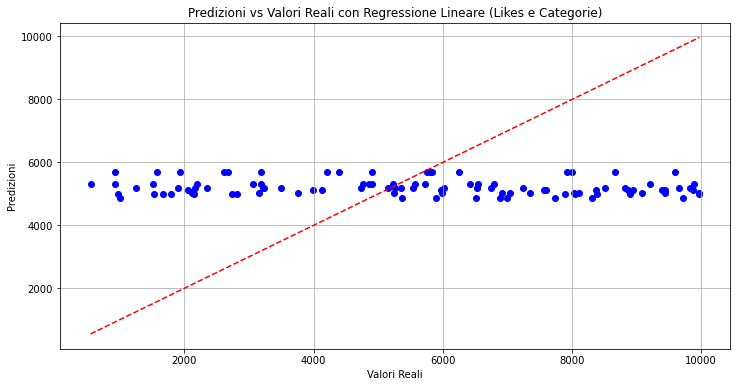

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


df = pd.get_dummies(df, columns=['Category'], drop_first=True)


print(df.columns)


X = df.drop(columns=['Likes']) 
y = df['Likes']   


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)




# show the result 
plt.figure(figsize=(12, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Predictions vs Real Values ​​with Linear Regression (Likes e Categorie)')
plt.xlabel('real values')
plt.ylabel('Predictions')
plt.grid(True)
plt.show()




In [27]:
# evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Mean Squared Error: 8026597.26
R^2 Score: -0.06


<p> If the likes values were randomly generated, it is understandable that the regression models would not perform well. In this case, the negative R² Score and Mean Squared Error results simply indicate that the model cannot make better predictions than a baseline model that predicts average likes. </p>